<a href="https://colab.research.google.com/github/sharaddobariya05/HSI-classification-/blob/master/HSI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn import decomposition
from sklearn import datasets

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd '/content/gdrive/My Drive/hsi'

/content/gdrive/My Drive/hsi


In [4]:
df = pd.read_csv("Complete_Data_.csv")

In [5]:
from sklearn.preprocessing import StandardScaler
n=[]
ind=[]
for i in range(200):
    n.append(i+1)
for i in range(200):
    ind.append('px'+str(n[i]))

features = ind
X = df.loc[:, features].values
# Separating out the target
Y = df.loc[:,['target']].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X, Y, test_size = 0.3, random_state = 100)
y_train=y_train.ravel()
y_test=y_test.ravel()
#classifier.fit(X_train, y_train.squeeze())

from sklearn.neighbors import KNeighborsClassifier  # FOR K=13 ,IT HAS ACCURACY AROUND 72.7488902980
from sklearn import metrics
import time
#model = KNeighborsClassifier()
model=KNeighborsClassifier(n_neighbors =13, weights='uniform', algorithm='auto')
model.fit(X_train, y_train)
start = time.time()
Yhat = model.predict(X_test)
end = time.time()
print('Time Taken For Classification is :',(end - start))
print("Accuracy :",metrics.accuracy_score(Yhat, y_test)*100)
print('\n','*'*11,'Accuracy of INDIAN-PINES Dataset Before PCA','*'*11)
print('*'*11,' Classifier : K-NEAREST NEIGHBOUR ','*'*11)
for K in range(25):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train) 
 y_pred = neigh.predict(X_test)
 print ("Accuracy is :%1.10f"%(metrics.accuracy_score(y_test,y_pred)*100),"% ","for K-Value: %4d"%(K_value))

Time Taken For Classification is : 4.396031141281128
Accuracy : 72.74889029803424

 *********** Accuracy of INDIAN-PINES Dataset Before PCA ***********
***********  Classifier : K-NEAREST NEIGHBOUR  ***********
Accuracy is :68.4686112873 %  for K-Value:    1
Accuracy is :69.6100190235 %  for K-Value:    2
Accuracy is :71.2270133164 %  for K-Value:    3
Accuracy is :71.4013950539 %  for K-Value:    4
Accuracy is :71.6550412175 %  for K-Value:    5
Accuracy is :72.1781864299 %  for K-Value:    6
Accuracy is :72.0513633481 %  for K-Value:    7
Accuracy is :72.0038046925 %  for K-Value:    8
Accuracy is :72.4318325935 %  for K-Value:    9
Accuracy is :72.5428027901 %  for K-Value:   10
Accuracy is :72.5586556753 %  for K-Value:   11
Accuracy is :72.5269499049 %  for K-Value:   12
Accuracy is :72.7488902980 %  for K-Value:   13
Accuracy is :72.6062143310 %  for K-Value:   14
Accuracy is :72.6696258719 %  for K-Value:   15
Accuracy is :72.1147748890 %  for K-Value:   16
Accuracy is :72.38427

In [6]:
   pip install spectral


     |████████████████████████████████| 215kB 2.1MB/s 


In [7]:
import keras
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Dropout, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

from operator import truediv

from plotly.offline import init_notebook_mode

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import spectral

init_notebook_mode(connected=True)
%matplotlib inline


In [8]:
dataset = 'IP'
test_ratio = 0.7
windowSize = 25

In [54]:
dataset1 = 'PU'
test_ratio = 0.7
windowSize = 25

In [9]:
def loadData(name):
    data_path = os.path.join(os.getcwd(),'data')
    if name == 'IP':
        data = sio.loadmat(os.path.join(data_path, 'Indian_pines_corrected.mat'))['indian_pines_corrected']
        labels = sio.loadmat(os.path.join(data_path, 'Indian_pines_gt.mat'))['indian_pines_gt']
    elif name == 'SA':
        data = sio.loadmat(os.path.join(data_path, 'Salinas_corrected.mat'))['salinas_corrected']
        labels = sio.loadmat(os.path.join(data_path, 'Salinas_gt.mat'))['salinas_gt']
    elif name == 'PU':
        data = sio.loadmat(os.path.join(data_path, 'PaviaU.mat'))['paviaU']
        labels = sio.loadmat(os.path.join(data_path, 'PaviaU_gt.mat'))['paviaU_gt']
    
    return data, labels

In [10]:
def splitTrainTestSet(X, y, testRatio, randomState=345):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testRatio, random_state=randomState,
                                                        stratify=y)
    return X_train, X_test, y_train, y_test


In [11]:
def applyPCA(X, numComponents=75):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

In [12]:
def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX

In [13]:
def createImageCubes(X, y, windowSize=5, removeZeroLabels = True):
    margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)
    # split patches
    patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
    patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
    patchIndex = 0
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]   
            patchesData[patchIndex, :, :, :] = patch
            patchesLabels[patchIndex] = y[r-margin, c-margin]
            patchIndex = patchIndex + 1
    if removeZeroLabels:
        patchesData = patchesData[patchesLabels>0,:,:,:]
        patchesLabels = patchesLabels[patchesLabels>0]
        patchesLabels -= 1
    return patchesData, patchesLabels



In [14]:
X, y = loadData(dataset)

X.shape, y.shape

((145, 145, 200), (145, 145))

In [15]:
K = X.shape[2]

In [16]:
K = 30 if dataset == 'IP' else 15
X,pca = applyPCA(X,numComponents=K)

X.shape

(145, 145, 30)

In [17]:
X, y = createImageCubes(X, y, windowSize=windowSize)

X.shape, y.shape

((10249, 25, 25, 30), (10249,))

In [18]:
Xtrain, Xtest, ytrain, ytest = splitTrainTestSet(X, y, test_ratio)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((3074, 25, 25, 30), (7175, 25, 25, 30), (3074,), (7175,))

In [19]:
Xtrain = Xtrain.reshape(-1, windowSize, windowSize, K, 1)
Xtrain.shape

(3074, 25, 25, 30, 1)

In [20]:
ytrain = np_utils.to_categorical(ytrain)
ytrain.shape

(3074, 16)

In [21]:
S = windowSize
L = K
output_units = 9 if (dataset == 'PU' or dataset == 'PC') else 16

In [22]:
input_layer = Input((S, S, L, 1))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 7), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 5), activation='relu')(conv_layer1)
conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(conv_layer2)
print(conv_layer3.shape)
conv3d_shape = conv_layer3.shape
conv_layer3 = Reshape((conv3d_shape[1], conv3d_shape[2], conv3d_shape[3]*conv3d_shape[4]))(conv_layer3)
conv_layer4 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(conv_layer3)

flatten_layer = Flatten()(conv_layer4)

## fully connected layers
dense_layer1 = Dense(units=256, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=128, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=output_units, activation='softmax')(dense_layer2)

(None, 19, 19, 18, 32)


In [23]:
# define the model with input layer and output layer
model = Model(inputs=input_layer, outputs=output_layer)

In [24]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 25, 25, 30, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 23, 23, 24, 8)     512       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 21, 21, 20, 16)    5776      
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 19, 19, 18, 32)    13856     
_________________________________________________________________
reshape (Reshape)            (None, 19, 19, 576)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 17, 17, 64)        331840    
_________________________________________________________________
flatten (Flatten)            (None, 18496)            

In [25]:
# compiling the model
adam = Adam(lr=0.001, decay=1e-06)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [52]:
# checkpoint
filepath = '/content/gdrive/My Drive/hsi/best-model.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [28]:
history = model.fit(x=Xtrain, y=ytrain, batch_size=256, epochs=100, callbacks=callbacks_list)

Epoch 1/100
13/13 [==============================] - 2s 117ms/step - loss: 0.0591 - accuracy: 0.9808
Epoch 2/100
13/13 [==============================] - 2s 117ms/step - loss: 0.0506 - accuracy: 0.9854
Epoch 3/100
13/13 [==============================] - 2s 116ms/step - loss: 0.0464 - accuracy: 0.9873
Epoch 4/100
13/13 [==============================] - 2s 117ms/step - loss: 0.1104 - accuracy: 0.9691
Epoch 5/100
13/13 [==============================] - 2s 118ms/step - loss: 0.0530 - accuracy: 0.9828
Epoch 6/100
13/13 [==============================] - 2s 117ms/step - loss: 0.0514 - accuracy: 0.9860
Epoch 7/100
13/13 [==============================] - 2s 118ms/step - loss: 0.0380 - accuracy: 0.9889
Epoch 8/100
13/13 [==============================] - 2s 116ms/step - loss: 0.0429 - accuracy: 0.9902
Epoch 9/100
13/13 [==============================] - 2s 117ms/step - loss: 0.0367 - accuracy: 0.9909
Epoch 10/100
13/13 [==============================] - 2s 118ms/step - loss: 0.0245 - accura

In [53]:
# load best weights
model.load_weights("best-model.hdf5")
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

OSError: ignored

In [50]:
cd /content/gdrive/My Drive/hsi

/content/gdrive/My Drive/hsi


In [30]:
Xtest = Xtest.reshape(-1, windowSize, windowSize, K, 1)
Xtest.shape

(7175, 25, 25, 30, 1)

In [31]:
ytest = np_utils.to_categorical(ytest)
ytest.shape

(7175, 16)

In [32]:
Y_pred_test = model.predict(Xtest)
y_pred_test = np.argmax(Y_pred_test, axis=1)

classification = classification_report(np.argmax(ytest, axis=1), y_pred_test)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.99      0.99      1000
           2       0.99      1.00      1.00       581
           3       1.00      1.00      1.00       166
           4       0.99      1.00      1.00       338
           5       0.99      1.00      0.99       511
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00       335
           8       1.00      0.86      0.92        14
           9       1.00      1.00      1.00       680
          10       1.00      1.00      1.00      1719
          11       1.00      0.99      1.00       415
          12       1.00      1.00      1.00       143
          13       1.00      1.00      1.00       886
          14       1.00      1.00      1.00       270
          15       0.97      1.00      0.98        65

    accuracy                           1.00      7175
   macro avg       1.00   

In [33]:
def AA_andEachClassAccuracy(confusion_matrix):
    counter = confusion_matrix.shape[0]
    list_diag = np.diag(confusion_matrix)
    list_raw_sum = np.sum(confusion_matrix, axis=1)
    each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
    average_acc = np.mean(each_acc)
    return each_acc, average_acc

In [34]:
def reports (X_test,y_test,name):
    #start = time.time()
    Y_pred = model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)
    #end = time.time()
    #print(end - start)
    if name == 'IP':
        target_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
                        ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 
                        'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
                        'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
                        'Stone-Steel-Towers']
    elif name == 'SA':
        target_names = ['Brocoli_green_weeds_1','Brocoli_green_weeds_2','Fallow','Fallow_rough_plow','Fallow_smooth',
                        'Stubble','Celery','Grapes_untrained','Soil_vinyard_develop','Corn_senesced_green_weeds',
                        'Lettuce_romaine_4wk','Lettuce_romaine_5wk','Lettuce_romaine_6wk','Lettuce_romaine_7wk',
                        'Vinyard_untrained','Vinyard_vertical_trellis']
    elif name == 'PU':
        target_names = ['Asphalt','Meadows','Gravel','Trees', 'Painted metal sheets','Bare Soil','Bitumen',
                        'Self-Blocking Bricks','Shadows']
    
    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
    oa = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    each_acc, aa = AA_andEachClassAccuracy(confusion)
    kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)
    score = model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss =  score[0]*100
    Test_accuracy = score[1]*100
    
    return classification, confusion, Test_Loss, Test_accuracy, oa*100, each_acc*100, aa*100, kappa*100

In [35]:
classification, confusion, Test_loss, Test_accuracy, oa, each_acc, aa, kappa = reports(Xtest,ytest,dataset)
classification = str(classification)
confusion = str(confusion)
file_name = "classification_report.txt"

with open(file_name, 'w') as x_file:
    x_file.write('{} Test loss (%)'.format(Test_loss))
    x_file.write('\n')
    x_file.write('{} Test accuracy (%)'.format(Test_accuracy))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('{} Kappa accuracy (%)'.format(kappa))
    x_file.write('\n')
    x_file.write('{} Overall accuracy (%)'.format(oa))
    x_file.write('\n')
    x_file.write('{} Average accuracy (%)'.format(aa))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('{}'.format(classification))
    x_file.write('\n')
    x_file.write('{}'.format(confusion))

225/225 [==============================] - 2s 9ms/step - loss: 0.0107 - accuracy: 0.9968


In [36]:
def Patch(data,height_index,width_index):
    height_slice = slice(height_index, height_index+PATCH_SIZE)
    width_slice = slice(width_index, width_index+PATCH_SIZE)
    patch = data[height_slice, width_slice, :]
    
    return patch

In [37]:
X, y = loadData(dataset)


In [38]:
height = y.shape[0]
width = y.shape[1]
PATCH_SIZE = windowSize
numComponents = K

In [39]:
X,pca = applyPCA(X, numComponents=numComponents)


In [40]:
X = padWithZeros(X, PATCH_SIZE//2)


In [41]:
outputs = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        target = int(y[i,j])
        if target == 0 :
            continue
        else :
            image_patch=Patch(X,i,j)
            X_test_image = image_patch.reshape(1,image_patch.shape[0],image_patch.shape[1], image_patch.shape[2], 1).astype('float32')                                   
            prediction = (model.predict(X_test_image))
            prediction = np.argmax(prediction, axis=1)
            outputs[i][j] = prediction+1

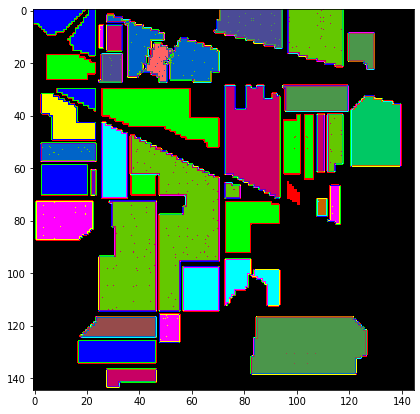

In [42]:
ground_truth = spectral.imshow(classes = y,figsize =(7,7))

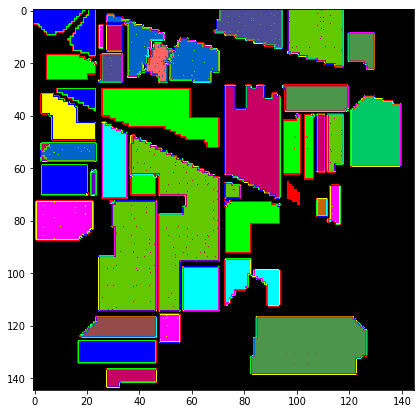

In [43]:
predict_image = spectral.imshow(classes = outputs.astype(int),figsize =(7,7))

In [44]:
spectral.save_rgb("predictions.jpg", outputs.astype(int), colors=spectral.spy_colors)